In [1]:
import numpy as np 
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,accuracy_score,log_loss,auc,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier


In [2]:
df1=pd.read_csv('train.csv')
df2=pd.read_csv('test.csv')

In [3]:
df1.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print(df1.shape)
print('_'*40)
print(df1.isnull().sum())

(891, 12)
________________________________________
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
train=df1.copy()
train['Age'].fillna(df1['Age'].median(skipna=True),inplace=True)
# train['Age'].fillna(df1['Age'].mean(skipna=True),inplace=True)
train['Embarked'].fillna(df1['Embarked'].value_counts().idxmax(),inplace=True)
train.drop('Cabin',inplace=True,axis=1)
train.drop('PassengerId',inplace=True,axis=1)


In [7]:
test=df2.copy()
test['Age'].fillna(df2['Age'].median(skipna=True),inplace=True)
#test['Age'].fillna(df2['Age'].mean(skipna=True),inplace=True)
test['Embarked'].fillna(df2['Embarked'].value_counts().idxmax(),inplace=True)
test.drop('Cabin',inplace=True,axis=1)
test.drop('PassengerId',inplace=True,axis=1)
df2[['Pclass','Fare']].groupby(['Pclass'],as_index=False).mean()
test['Fare'].fillna(14.45,inplace=True)

In [8]:
merge=[train,test]
for data in merge:
    data['title']=data.Name.str.extract('([A-Za-z]+)\.')

<AxesSubplot:>

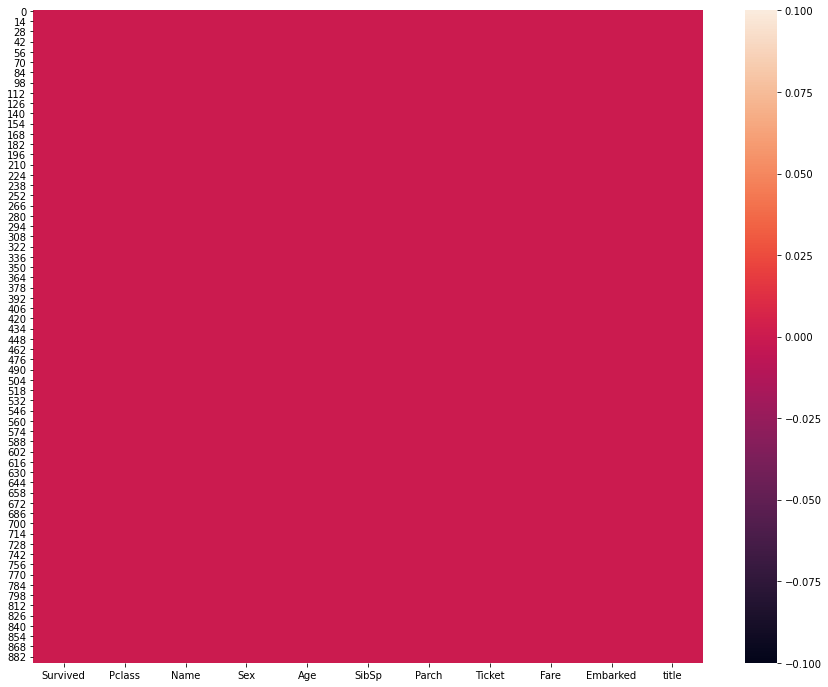

In [9]:
plt.figure(figsize=(15,12))
sns.heatmap(train.isnull())

<AxesSubplot:>

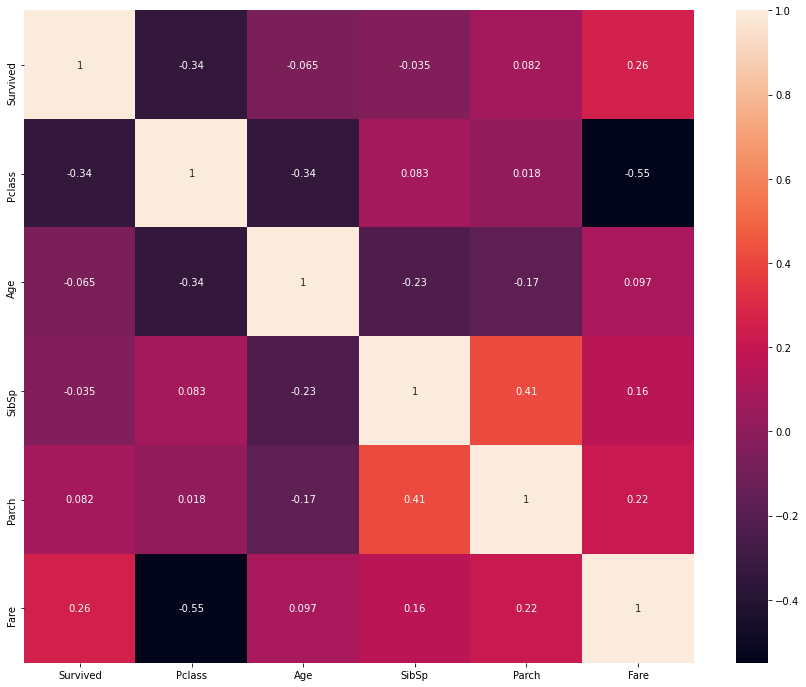

In [10]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True)

In [11]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.describe(include=['O'])

,Name,Sex,Ticket,Embarked,title
count,891,891,891,891,891
unique,891,2,681,3,17
top,"Panula, Mr. Jaako Arnold",male,1601,S,Mr
freq,1,577,7,646,517


In [13]:
ps=train[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean()

In [14]:
train.groupby(['Pclass'],as_index=False).mean()

,Pclass,Survived,Age,SibSp,Parch,Fare
0,1,0.629630,36.812130,0.416667,0.356481,84.154687
1,2,0.472826,29.765380,0.402174,0.380435,20.662183
2,3,0.242363,25.932627,0.615071,0.393075,13.675550


In [15]:
train[['Pclass','Fare']].groupby(['Pclass'],as_index=False).sum()

,Pclass,Fare
0,1,18177.4125
1,2,3801.8417
2,3,6714.6951


In [16]:
print(train['Pclass'].value_counts())
print('**'*25)
print(train['Sex'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64
**************************************************
male      577
female    314
Name: Sex, dtype: int64


In [17]:
avg=train[['Sex','Survived']].groupby(['Sex'],as_index=False).sum()

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

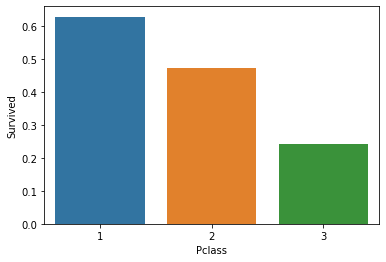

In [18]:
sns.barplot(ps['Pclass'],ps['Survived'])

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

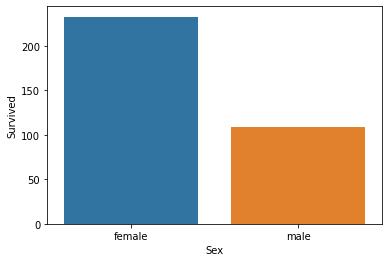

In [19]:
sns.barplot(avg['Sex'],avg['Survived'])

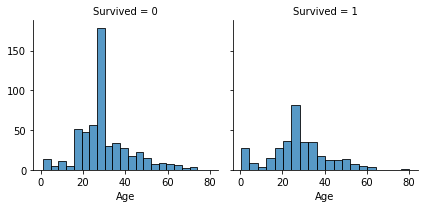

In [20]:
p=sns.FacetGrid(train,col='Survived')
p.map(sns.histplot, 'Age', bins=20)

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


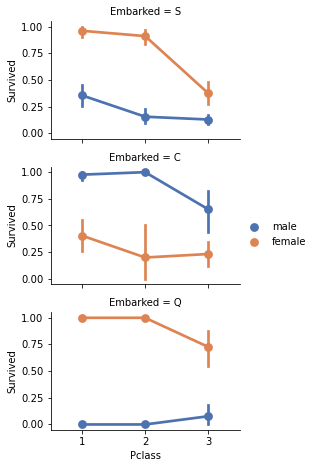

In [21]:
g = sns.FacetGrid(train, row='Embarked', size=2.2, aspect=1.6)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
g.add_legend()

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


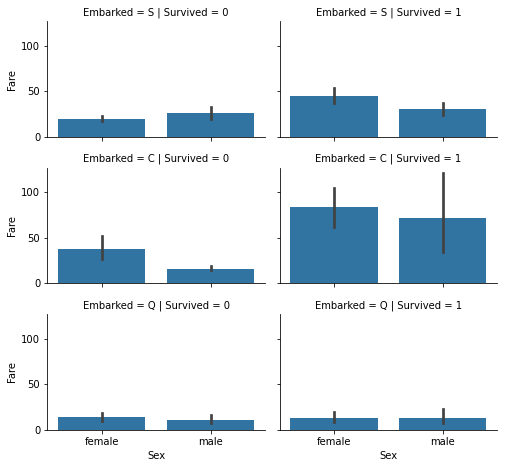

In [22]:
t = sns.FacetGrid(train, row='Embarked',col='Survived' ,size=2.2, aspect=1.6)
t.map(sns.barplot,'Sex','Fare')
t.add_legend()

D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
D:\Old Hdd\NotesSig\srivastav\o\ps\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


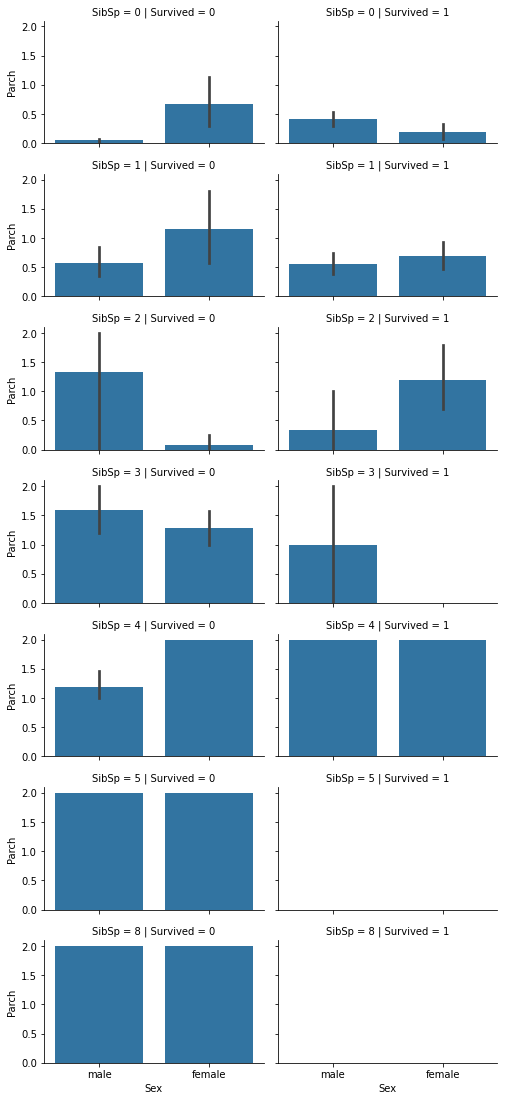

In [23]:
l = sns.FacetGrid(train, row='SibSp',col='Survived' ,size=2.2, aspect=1.6)
l.map(sns.barplot,'Sex','Parch')
l.add_legend()

In [24]:
test.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
title       0
dtype: int64

In [25]:
print(train['title'].value_counts())
print('+'*50)
print(train['title'].isnull().sum())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Lady          1
Sir           1
Don           1
Jonkheer      1
Mme           1
Countess      1
Capt          1
Ms            1
Name: title, dtype: int64
++++++++++++++++++++++++++++++++++++++++++++++++++
0


In [26]:
test['title'].fillna('Mr',inplace=True)

In [27]:
for data in merge:
    data['title']=data.title.replace(['Dr','Rev','Major','Col','Lady','Capt','Jonkheer','Countess','Sir','Don','Dona'],'rare')
    data['title']=data.title.replace(['Mlle','Ms'],'Miss')
    data['title']=data.title.replace('Mme','Miss')

In [28]:
for dataset in merge:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.00,S,rare
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.00,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.45,S,Miss
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.00,C,Mr
890,0,3,"Dooley, Mr. Patrick",0,32.0,0,0,370376,7.75,Q,Mr


In [29]:
titlemap={'Mr':1,'Miss':2,'Master':4,'Mrs':3,'rare':5}
for data in merge:
    data['title']=data['title'].map(titlemap)
    

In [30]:
train['alone']=np.where(train['SibSp']+train['Parch']==0,0,1)
test['alone']=np.where(test['SibSp']+test['Parch']==0,0,1)
train['family']=train['SibSp']+train['Parch']+1
test['family']=np.where(df2['SibSp']+df2['Parch']>0,1,0)

In [31]:
train.drop('SibSp',inplace=True,axis=1)
train.drop('Parch',inplace=True,axis=1)
test.drop('SibSp',inplace=True,axis=1)
test.drop('Parch',inplace=True,axis=1)
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [32]:
for data in merge:
    data['Embarked']=data['Embarked'].map({'S':1,'Q':2,'C':3}).astype(int)

In [33]:
train['fareBand'] = pd.qcut(train['Fare'], 4)

In [34]:
for data in merge:
    data.loc[data['Fare']<=7.91,'Fare']=0
    data.loc[(data['Fare']>7.91 )& (data['Fare']<=14.454),'Fare']=1
    data.loc[(data['Fare']>14.454) & (data['Fare']<=31.0),'Fare']=2
    data.loc[data['Fare']>31.0 ,'Fare']=3

In [35]:
train['Fare'],test['Fare']=train['Fare'].astype(int),test['Fare'].astype(int)
train.drop('fareBand',axis=1,inplace=True)

In [36]:
train['ageeBand'] = pd.qcut(train['Age'], 6)
train['ageeBand'].value_counts()

(25.0, 28.0]     238
(0.419, 19.0]    164
(40.5, 80.0]     148
(31.0, 40.5]     138
(19.0, 25.0]     137
(28.0, 31.0]      66
Name: ageeBand, dtype: int64

In [37]:
for data in merge:
    data.loc[data['Age']<=19,'Age']=0
    data.loc[(data['Age']>19) & (data['Age']<=25),'Age']=1
    data.loc[(data['Age']>25) & (data['Age']<=28),'Age']=2
    data.loc[(data['Age']>28) & (data['Age']<=31),'Age']=3
    data.loc[(data['Age']>31) & (data['Age']<=40.5),'Age']=4
    data.loc[(data['Age']>40.5),'Age']=5

In [38]:
train['Age'],test['Age']=train['Age'].astype(int),test['Age'].astype(int)
train.drop('ageeBand',axis=1,inplace=True)

In [39]:
train[['title','Survived']].groupby(train['title']).mean()

,title,Survived
title,,
1,1.0,0.156673
2,2.0,0.704301
3,3.0,0.792000
4,4.0,0.575000
5,5.0,0.347826


In [40]:
train[['family','Survived']].groupby(['family'],as_index=False).mean()

,family,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [41]:
train[['alone','Survived']].groupby(['alone'],as_index=False).mean()

,alone,Survived
0,0,0.303538
1,1,0.505650


In [42]:
print(test.isnull().sum())
print('*'*25)
train.isnull().sum()

Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
title       0
alone       0
family      0
dtype: int64
*************************


Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
title       0
alone       0
family      0
dtype: int64

In [43]:
# X=train.drop('Survived',axis=1)
# Y=train['Survived']

In [44]:
# xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=20)


In [45]:
print(train.head(2))
print('*'*25)
print(test.head(2))

   Survived  Pclass  Sex  Age  Fare  Embarked  title  alone  family
0         0       3    0    1     0         1      1      1       2
1         1       1    1    4     3         3      3      1       2
*************************
   Pclass  Sex  Age  Fare  Embarked  title  alone  family
0       3    0    4     0         2      1      0       0
1       3    1    5     0         1      3      1       1


In [46]:
xtrain=train.drop('Survived',axis=1)
ytrain=train['Survived']

In [47]:
lr=LogisticRegression(max_iter=10000)
lr.fit(xtrain,ytrain)

LogisticRegression(max_iter=10000)

In [48]:
lr.predict(test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [49]:
acc_log=round(lr.score(xtrain,ytrain)*100,2)
acc_log

81.37

In [50]:
coeff_df = pd.DataFrame(train.columns.delete(0))
coeff_df.columns=['feature']
coeff_df['score']=pd.Series(lr.coef_[0])
coeff_df

,feature,score
0,Pclass,-0.780068
1,Sex,2.202065
2,Age,-0.190221
3,Fare,0.199764
4,Embarked,0.204942
5,title,0.476985
6,alone,0.449551
7,family,-0.419812


In [51]:
svc= SVC()
svc.fit(xtrain,ytrain)
Y_pred=svc.predict(test)
svscore=round(svc.score(xtrain,ytrain)*100,2)
svscore

83.28

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
Y_pred=knn.predict(test)
knnscore=round(knn.score(xtrain,ytrain)*100,2)
knnscore

85.97

In [60]:
gaussian=GaussianNB()
gaussian.fit(xtrain,ytrain)
Y_pred=gaussian.predict(test)
gaussianscore=round(gaussian.score(xtrain,ytrain)*100,2)
gaussianscore


TypeError: __init__() got an unexpected keyword argument 'cv'

In [54]:
perceptron = Perceptron(alpha=0.0001)
perceptron.fit(xtrain, ytrain)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(xtrain, ytrain) * 100, 2)
acc_perceptron

79.8

In [55]:
linear_svc = LinearSVC(max_iter=1000000)
linear_svc.fit(xtrain, ytrain)
Y_pred = linear_svc.predict(test)
acc_linear_svc = round(linear_svc.score(xtrain, ytrain) * 100, 2)
acc_linear_svc

81.82

In [56]:
sgd = SGDClassifier(alpha=0.0000001,loss='log',max_iter=100000)
sgd.fit(xtrain, ytrain)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(xtrain, ytrain) * 100, 2)
acc_sgd

62.74

In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain, ytrain)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(xtrain, ytrain) * 100, 2)
acc_decision_tree

90.01

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(xtrain, ytrain)
Y_pred = random_forest.predict(test)
acc_random_forest = round(random_forest.score(xtrain, ytrain) * 100, 2)
acc_random_forest

90.01

In [59]:
submission = pd.DataFrame({
        "PassengerId": df2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)